<a href="https://colab.research.google.com/github/AayushiChoudhary01/PaAC-project/blob/main/Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow.keras import models, datasets, Sequential
from tensorflow.keras.layers import Conv2D, Conv2DTranspose, Input, Flatten, Dense, Lambda, Reshape, MaxPooling2D, GlobalAvgPool2D
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
!pip install astroNN

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 77.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 888.9/888.9 kB 70.7 MB/s eta 0:00:00


In [4]:
from astroNN.datasets import galaxy10sdss
from tensorflow.keras import utils

GALAXY 10

Preparing the data

In [5]:
X, y = galaxy10sdss.load_data()
X = X.astype(np.float32)/255
print(X.shape)

Galaxy10.h5:  99%|█████████▉| 208M/210M [00:19<00:00, 12.5MB/s]

Downloaded Galaxy10 successfully to /root/.astroNN/datasets/Galaxy10.h5


Galaxy10.h5: 210MB [00:22, 9.17MB/s]                           


(21785, 69, 69, 3)


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Autoencoder

1. For images it's better to use Convolutional Autoencoders.
2. The encoder part is composed of:-
    *   Three Convolutional layers
    *   Three Max Pooling layers
    *   One Average Global pooling layer
3. Objective of Encoder:-
    *  Reducing the dimensionality of Input Image (height and width).
    *  Increasing the Depth by Increasing the number of filters.
4. The Decoder part is composed of:-
    *  Transpose Convolutional layers
5. Objective of Decoder:-
    *  Upscaling the image.
    *  Reducing the depth back to original dimensions.



















In [7]:
encoder = Sequential([
    Conv2D(8, (3, 3), activation='relu', padding='same', input_shape=(69, 69, 3)),
    MaxPooling2D((3, 3), padding='same'),
    Conv2D(16, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2), padding='same'),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2), padding='same'),
    GlobalAvgPool2D()
], name='encoder')

decoder = Sequential([
    Dense(17 * 17 * 32, activation="relu", input_shape=(32,)),
    Reshape((17, 17, 32)),
    Conv2DTranspose(32, 3, strides=2, activation="relu", padding='same'),
    Conv2DTranspose(16, 3, strides=2, activation="relu"),
    Conv2DTranspose(3, 3, activation='sigmoid', padding='same')
], name='decoder')

print(decoder.summary())




Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 9248)              305184    
                                                                 
 reshape (Reshape)           (None, 17, 17, 32)        0         
                                                                 
 conv2d_transpose (Conv2DTr  (None, 34, 34, 32)        9248      
 anspose)                                                        
                                                                 
 conv2d_transpose_1 (Conv2D  (None, 69, 69, 16)        4624      
 Transpose)                                                      
                                                                 
 conv2d_transpose_2 (Conv2D  (None, 69, 69, 3)         435       
 Transpose)                                                      
                                                           

The cost function to minimize the mean squared error is:-





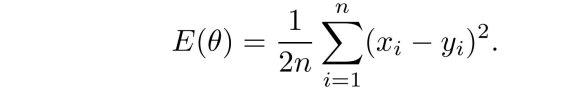

In [8]:
autoencoder = Sequential([encoder, decoder])
autoencoder.compile(optimizer='nadam', loss='mse')

In [9]:
autoencoder.fit(X_train, X_train, epochs=15, batch_size = 32, validation_data=(X_test, X_test))

Epoch 1/15
545/545 [==============================] - 28s 30ms/step - loss: 0.0110 - val_loss: 0.0029
Epoch 2/15
545/545 [==============================] - 7s 13ms/step - loss: 0.0029 - val_loss: 0.0028
Epoch 3/15
545/545 [==============================] - 6s 11ms/step - loss: 0.0028 - val_loss: 0.0027
Epoch 4/15
545/545 [==============================] - 6s 12ms/step - loss: 0.0025 - val_loss: 0.0021
Epoch 5/15
545/545 [==============================] - 6s 10ms/step - loss: 0.0020 - val_loss: 0.0020
Epoch 6/15
545/545 [==============================] - 7s 12ms/step - loss: 0.0019 - val_loss: 0.0019
Epoch 7/15
545/545 [==============================] - 6s 11ms/step - loss: 0.0018 - val_loss: 0.0017
Epoch 8/15
545/545 [==============================] - 7s 12ms/step - loss: 0.0017 - val_loss: 0.0017
Epoch 9/15
545/545 [==============================] - 6s 11ms/step - loss: 0.0016 - val_loss: 0.0016
Epoch 10/15
545/545 [==============================] - 7s 12ms/step - loss: 0.0016 - val_l

137/137 [==============================] - 1s 5ms/step


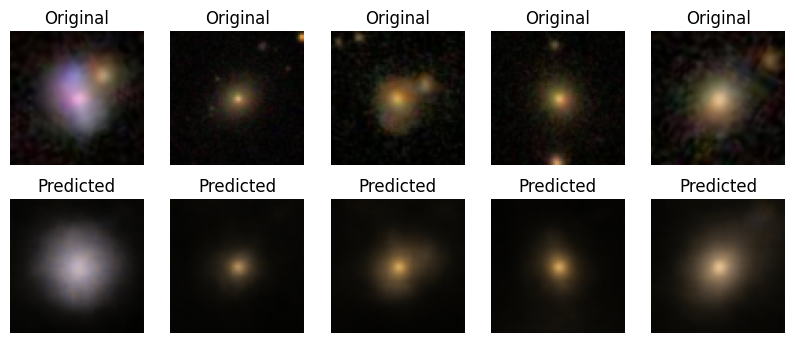

In [10]:
predicted_images = autoencoder.predict(X_test)


n_images = 5
plt.figure(figsize=(10, 4))

for i in range(n_images):

    ax = plt.subplot(2, n_images, i + 1)
    plt.imshow(X_test[i])
    plt.title("Original")
    plt.axis("off")


    ax = plt.subplot(2, n_images, i + n_images + 1)
    plt.imshow(predicted_images[i])
    plt.title("Predicted")
    plt.axis("off")

plt.show()

### Variational
1. The encoder produces a mean coding μ and a standard
deviation σ.
2. The actual coding is then sampled randomly from a Gaussian
distribution with mean μ and standard deviation σ.
3. after that decoder works similar to convolutional autoencoder.
4. The encoder part is composed of:-
   *   Two Conv2D layers
   *   Two dense layers
5. The decoder part is composed of:-
   *   Transpose Conv2D layers






In [33]:
class Sample(tf.keras.layers.Layer):
 def call(self, input):
  mean, log_var = input
  return tf.random.normal(tf.shape(log_var)) * tf.exp(log_var / 2) + mean

In [34]:
latent_size = 2

en_input = tf.keras.layers.Input(shape=[69, 69,3])
Z= Conv2D(32, 3, padding = 'same', activation = 'relu')(en_input)
Z= Conv2D(64, 3, padding = 'same', activation = 'relu')(Z)

Z = Flatten()(Z)
Z = Dense(150, activation="relu")(Z)
Z = Dense(100, activation="relu")(Z)

Z_mean = Dense(latent_size)(Z)
Z_log_var = Dense(latent_size)(Z)
Z = Sample()([Z_mean, Z_log_var])

var_encoder = tf.keras.Model(
inputs=[en_input], outputs=[Z_mean, Z_log_var, Z], name = 'var_encoder')

print(var_encoder.summary())

Model: "var_encoder"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_7 (InputLayer)        [(None, 69, 69, 3)]          0         []                            
                                                                                                  
 conv2d_9 (Conv2D)           (None, 69, 69, 32)           896       ['input_7[0][0]']             
                                                                                                  
 conv2d_10 (Conv2D)          (None, 69, 69, 64)           18496     ['conv2d_9[0][0]']            
                                                                                                  
 flatten_3 (Flatten)         (None, 304704)               0         ['conv2d_10[0][0]']           
                                                                                        

In [35]:
de_inputs = tf.keras.layers.Input(shape=[latent_size])

x = Dense(17 * 17 * 32, activation="relu")(de_inputs)

x = Reshape((17, 17, 32))(x)

x = Conv2DTranspose(32, 3, strides=2, activation="relu", padding='same')(x)
x = Conv2DTranspose(16, 3, strides=2, activation="relu")(x)

outputs = Conv2DTranspose(3, (3, 3), activation='relu', padding='same')(x)

var_decoder = tf.keras.Model(inputs=[de_inputs], outputs=
[outputs])

print(var_decoder.summary())

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense_20 (Dense)            (None, 9248)              27744     
                                                                 
 reshape_4 (Reshape)         (None, 17, 17, 32)        0         
                                                                 
 conv2d_transpose_12 (Conv2  (None, 34, 34, 32)        9248      
 DTranspose)                                                     
                                                                 
 conv2d_transpose_13 (Conv2  (None, 69, 69, 16)        4624      
 DTranspose)                                                     
                                                                 
 conv2d_transpose_14 (Conv2  (None, 69, 69, 3)         435 

1. The cost function is composed of two parts.
   *   Latent loss
   *   Reconstruction loss
2. Latent loss is the diveergence between gaussian distribution and actual distribution of the coding.
3. We use MSE (MEAN SQUARED ERROR) for construction loss

In [36]:
_, _, Z = var_encoder(en_input)
reconstructions = var_decoder(Z)
var_ae = tf.keras.Model(inputs=[en_input], outputs=[reconstructions])

In [37]:
latent_loss = -0.5 * tf.reduce_sum(
1 + Z_log_var - tf.exp(Z_log_var) - tf.square(Z_mean),
axis=-1)
var_ae.add_loss(tf.reduce_mean(latent_loss) / (69*69*3))  # write the full value in the multipilcation

In [38]:
var_ae.compile(loss="mse", optimizer="nadam")
var_ae.fit(X_train, X_train, epochs=15, batch_size=32,
validation_data=(X_test, X_test))

Epoch 1/15
545/545 [==============================] - 34s 55ms/step - loss: 0.0037 - val_loss: 0.0028
Epoch 2/15
545/545 [==============================] - 27s 49ms/step - loss: 0.0028 - val_loss: 0.0027
Epoch 3/15
545/545 [==============================] - 27s 50ms/step - loss: 0.0028 - val_loss: 0.0027
Epoch 4/15
545/545 [==============================] - 26s 48ms/step - loss: 0.0028 - val_loss: 0.0027
Epoch 5/15
545/545 [==============================] - 27s 50ms/step - loss: 0.0027 - val_loss: 0.0028
Epoch 6/15
545/545 [==============================] - 28s 51ms/step - loss: 0.0027 - val_loss: 0.0027
Epoch 7/15
545/545 [==============================] - 26s 49ms/step - loss: 0.0027 - val_loss: 0.0027
Epoch 8/15
545/545 [==============================] - 26s 49ms/step - loss: 0.0027 - val_loss: 0.0028
Epoch 9/15
545/545 [==============================] - 28s 51ms/step - loss: 0.0027 - val_loss: 0.0027
Epoch 10/15
545/545 [==============================] - 27s 49ms/step - loss: 0.002

137/137 [==============================] - 1s 7ms/step


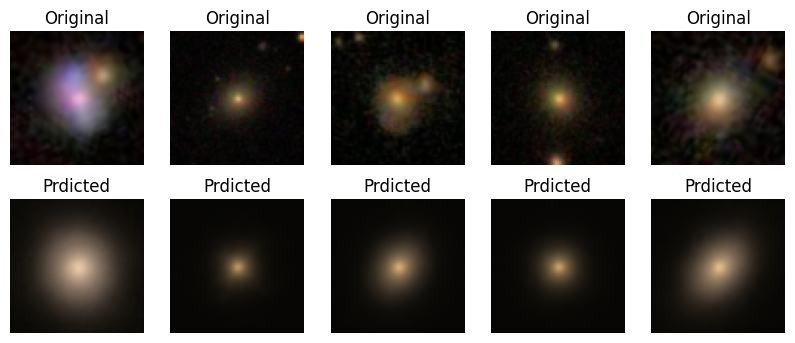

In [39]:
predicted_images = var_ae.predict(X_test)

n_images = 5
plt.figure(figsize=(10, 4))

for i in range(n_images):

    ax = plt.subplot(2, n_images, i + 1)
    plt.imshow(X_test[i])
    plt.title("Original")
    plt.axis("off")

    ax = plt.subplot(2, n_images, i + n_images + 1)
    plt.imshow(predicted_images[i])
    plt.title("Prdicted")
    plt.axis("off")

plt.show()

### For cifar10

### Variational

In [40]:
cifar10 = tf.keras.datasets.cifar10
(C_train, c_train), (C_test, c_test) = cifar10.load_data()

In [41]:
C_train = C_train.astype('float32') / 255.0
C_test = C_test.astype('float32') / 255.0

In [42]:
class Sample(tf.keras.layers.Layer):
 def call(self, input):
  mean, log_var = input
  return tf.random.normal(tf.shape(log_var)) * tf.exp(log_var / 2) + mean

In [43]:
latent_size = 2

en_input = tf.keras.layers.Input(shape=[32,32 ,3])

Z= Conv2D(32, 3, padding = 'same', activation = 'relu')(en_input)
Z= Conv2D(64, 3, padding = 'same', activation = 'relu')(Z)

Z = Flatten()(Z)
Z = Dense(150, activation="relu")(Z)
Z = Dense(100, activation="relu")(Z)

Z_mean = Dense(latent_size)(Z)
Z_log_var = Dense(latent_size)(Z)
Z = Sample()([Z_mean, Z_log_var])

var_encoder = tf.keras.Model(
inputs=[en_input], outputs=[Z_mean, Z_log_var, Z], name = 'var_encoder')
print(var_encoder.summary())

Model: "var_encoder"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_9 (InputLayer)        [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 conv2d_11 (Conv2D)          (None, 32, 32, 32)           896       ['input_9[0][0]']             
                                                                                                  
 conv2d_12 (Conv2D)          (None, 32, 32, 64)           18496     ['conv2d_11[0][0]']           
                                                                                                  
 flatten_4 (Flatten)         (None, 65536)                0         ['conv2d_12[0][0]']           
                                                                                        

In [44]:
de_input = tf.keras.layers.Input(shape=[latent_size])

x = Dense(8 * 8 * 32, activation="relu")(de_input)

x = Reshape((8, 8, 32))(x)
x = Conv2DTranspose(32, 3, strides=2, activation="relu", padding='same')(x)
x = Conv2DTranspose(16, 3, strides=2, activation="relu", padding='same')(x)

outputs = Conv2DTranspose(3, (3, 3), activation='relu', padding='same')(x)
var_decoder = tf.keras.Model(inputs=[de_input], outputs=
[outputs])

print(var_decoder.summary())

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 2)]               0         
                                                                 
 dense_25 (Dense)            (None, 2048)              6144      
                                                                 
 reshape_5 (Reshape)         (None, 8, 8, 32)          0         
                                                                 
 conv2d_transpose_15 (Conv2  (None, 16, 16, 32)        9248      
 DTranspose)                                                     
                                                                 
 conv2d_transpose_16 (Conv2  (None, 32, 32, 16)        4624      
 DTranspose)                                                     
                                                                 
 conv2d_transpose_17 (Conv2  (None, 32, 32, 3)         435 

In [45]:
_, _, Z = var_encoder(en_input)
reconstructions = var_decoder(Z)
var_ae = tf.keras.Model(inputs=[en_input], outputs=[reconstructions])

In [46]:
latent_loss = -0.5 * tf.reduce_sum(
1 + Z_log_var - tf.exp(Z_log_var) - tf.square(Z_mean),
axis=-1)
var_ae.add_loss(tf.reduce_mean(latent_loss) / (32*32*3)) # write the full value in the multipilcation

In [47]:
var_ae.compile(loss="mse", optimizer="nadam")
var_ae.fit(C_train, C_train, epochs=15, batch_size=32, validation_data=(C_test, C_test))

Epoch 1/15
1563/1563 [==============================] - 34s 18ms/step - loss: 0.0429 - val_loss: 0.0390
Epoch 2/15
1563/1563 [==============================] - 26s 17ms/step - loss: 0.0387 - val_loss: 0.0385
Epoch 3/15
1563/1563 [==============================] - 26s 17ms/step - loss: 0.0387 - val_loss: 0.0382
Epoch 4/15
1563/1563 [==============================] - 26s 17ms/step - loss: 0.0388 - val_loss: 0.0382
Epoch 5/15
1563/1563 [==============================] - 26s 17ms/step - loss: 0.0385 - val_loss: 0.0399
Epoch 6/15
1563/1563 [==============================] - 26s 17ms/step - loss: 0.0393 - val_loss: 0.0393
Epoch 7/15
1563/1563 [==============================] - 26s 17ms/step - loss: 0.0394 - val_loss: 0.0389
Epoch 8/15
1563/1563 [==============================] - 27s 17ms/step - loss: 0.0387 - val_loss: 0.0388
Epoch 9/15
1563/1563 [==============================] - 26s 17ms/step - loss: 0.0384 - val_loss: 0.0381
Epoch 10/15
1563/1563 [==============================] - 26s 17m

313/313 [==============================] - 2s 4ms/step


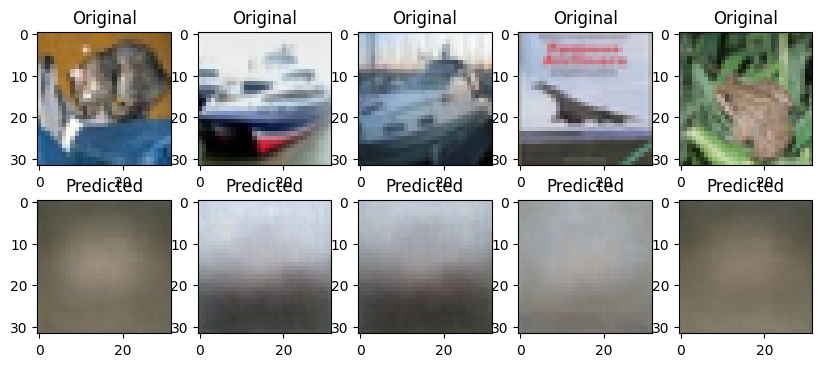

In [48]:
predicted_images = var_ae.predict(C_test)

n_images = 5
plt.figure(figsize=(10, 4))

for i in range(n_images):

    ax = plt.subplot(2, n_images, i + 1)
    plt.imshow(C_test[i])
    plt.title("Original")


    ax = plt.subplot(2, n_images, i + n_images + 1)
    plt.imshow(predicted_images[i])
    plt.title("Predicted")


plt.show()

### Autoencoder

In [49]:
encoder = Sequential([
    Conv2D(8, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    MaxPooling2D((3, 3), padding='same'),
    Conv2D(16, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2), padding='same'),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2), padding='same'),
    GlobalAvgPool2D()
], name='encoder')

decoder = Sequential([
    Dense(8 * 8 * 32, activation="relu", input_shape=(32,)),
    Reshape((8, 8, 32)),
    Conv2DTranspose(32, 3, strides=2, activation="relu", padding='same'),
    Conv2DTranspose(16, 3, strides=2, activation="relu", padding='same'),
    Conv2DTranspose(3, 3, activation='sigmoid', padding='same')
], name='decoder')

print(decoder.summary())

Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 2048)              67584     
                                                                 
 reshape_6 (Reshape)         (None, 8, 8, 32)          0         
                                                                 
 conv2d_transpose_18 (Conv2  (None, 16, 16, 32)        9248      
 DTranspose)                                                     
                                                                 
 conv2d_transpose_19 (Conv2  (None, 32, 32, 16)        4624      
 DTranspose)                                                     
                                                                 
 conv2d_transpose_20 (Conv2  (None, 32, 32, 3)         435       
 DTranspose)                                                     
                                                           

In [50]:
autoencoder = Sequential([encoder, decoder])
autoencoder.compile(optimizer='adam', loss='mse')

In [51]:
autoencoder.fit(C_train, C_train, epochs=15, batch_size = 32, validation_data=(C_test, C_test))

Epoch 1/15
1563/1563 [==============================] - 16s 8ms/step - loss: 0.0334 - val_loss: 0.0236
Epoch 2/15
1563/1563 [==============================] - 12s 7ms/step - loss: 0.0211 - val_loss: 0.0184
Epoch 3/15
1563/1563 [==============================] - 11s 7ms/step - loss: 0.0170 - val_loss: 0.0160
Epoch 4/15
1563/1563 [==============================] - 12s 8ms/step - loss: 0.0156 - val_loss: 0.0152
Epoch 5/15
1563/1563 [==============================] - 12s 7ms/step - loss: 0.0150 - val_loss: 0.0149
Epoch 6/15
1563/1563 [==============================] - 12s 7ms/step - loss: 0.0147 - val_loss: 0.0147
Epoch 7/15
1563/1563 [==============================] - 12s 8ms/step - loss: 0.0145 - val_loss: 0.0146
Epoch 8/15
1563/1563 [==============================] - 12s 7ms/step - loss: 0.0143 - val_loss: 0.0142
Epoch 9/15
1563/1563 [==============================] - 12s 7ms/step - loss: 0.0142 - val_loss: 0.0142
Epoch 10/15
1563/1563 [==============================] - 12s 8ms/step - l

313/313 [==============================] - 1s 2ms/step


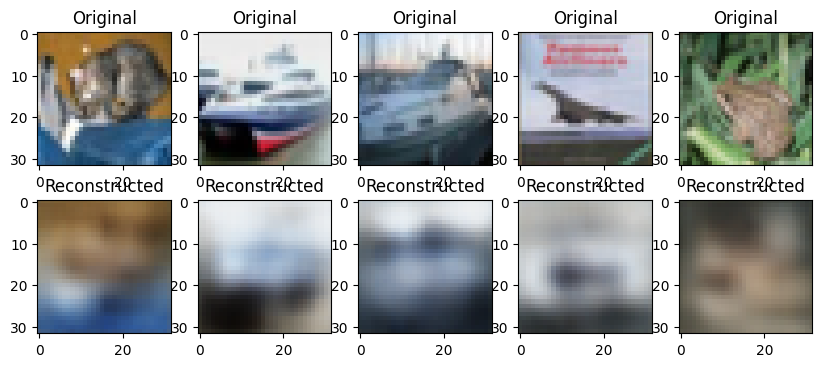

In [52]:
predicted_images = autoencoder.predict(C_test)


n_images = 5
plt.figure(figsize=(10, 4))

for i in range(n_images):

    ax = plt.subplot(2, n_images, i + 1)
    plt.imshow(C_test[i])
    plt.title("Original")


    ax = plt.subplot(2, n_images, i + n_images + 1)
    plt.imshow(predicted_images[i])
    plt.title("Reconstructed")

plt.show()